
---

<br>
<br>

# # Title: Audio Classifier :

<br>
<br>



- convert audio data to wavefrom 
- transform waveform to spectrogram
- classify capuchin bird calls

#  `tensorflow-io` for audio processing

---

Question: `What is the difference between tensor and numpy array and normal python array()`

<br>

---

<br>

In [1]:
#
# 
# Downlaod data:  
#
#

# !pip install kagglehub

# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("kenjee/z-by-hp-unlocked-challenge-3-signal-processing")

# print("Path to dataset files:", path)



---

<br>
<br>

# `# 1. Load Dependencies: `

<br>
<br>

---

In [2]:


import os
import seaborn as sns
import tensorflow as tf 
import tensorflow_io as tfio
import matplotlib.pyplot as plt 



2024-11-13 21:09:09.171924: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 21:09:09.579567: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 21:09:11.044728: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-13 21:09:15.701396: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


---

<br>
<br>

# `# 2. Build Data Loading pipeline: `

<br>
<br>

---

In [3]:


CAPUCHIN_FILE = os.path.join('dataset','Parsed_Capuchinbird_Clips','XC3776-0.wav')
NOT_CAPUCHIN_FILE = os.path.join('dataset','Parsed_Not_Capuchinbird_Clips','afternoon-birds-song-in-forest-0.wav')
CAPUCHIN_FILE



'dataset/Parsed_Capuchinbird_Clips/XC3776-0.wav'


<br>
<br>

---

<br>
<br>

# info about the code: 

```python
wav, sample_rate = tf.audio.decode_wav(file_content)

```

### 1. **`wav = [num_samples, num_channels]`**
This represents the shape of the audio waveform tensor:

- **`num_samples`**:
  - This is the total number of audio samples in the waveform.
  - An audio sample is a single data point in the digital representation of sound.
  - The number of samples depends on the duration of the audio and the sample rate. For example, if you have a 1-second audio clip sampled at 16 kHz, then `num_samples = 16000` (16,000 samples per second).

- **`num_channels`**:
  - This refers to the number of audio channels:
    - **1 (Mono)**: Single channel of audio (e.g., most voice recordings).
    - **2 (Stereo)**: Two channels (left and right), used in most music recordings.
  - If `num_channels = 1`, the audio is mono. If `num_channels = 2`, it is stereo.
  - Mono audio has shape `[num_samples, 1]`, and stereo audio has shape `[num_samples, 2]`.

**Example:**
For a stereo audio file sampled at 44.1 kHz (common in music recordings):
- Shape might be `[44100, 2]` for a 1-second clip.
  - `44100` samples (1 second of audio at 44.1 kHz).
  - `2` channels (stereo: left and right).

For a mono audio file sampled at 16 kHz:
- Shape might be `[16000, 1]` for a 1-second clip.
  - `16000` samples (1 second of audio at 16 kHz).
  - `1` channel (mono).

### 2. **`sample_rate`**
The sample rate is the number of audio samples captured per second and is measured in Hertz (Hz).

- **Common Sample Rates:**
  - **8,000 Hz (8 kHz)**: Used in telephone audio (low quality).
  - **16,000 Hz (16 kHz)**: Often used in speech and voice recognition applications.
  - **22,050 Hz (22.05 kHz)**: Used in lower-quality music streaming.
  - **44,100 Hz (44.1 kHz)**: Standard for music CDs.
  - **48,000 Hz (48 kHz)**: Used in professional video production.



### `3. Why Resample to 16 kHz?`

**Consistency:** Models are usually trained on data with a specific sample rate (e.g., 16 kHz). Using a consistent sample rate helps ensure better performance.

**Efficiency:** Lowering the sample rate reduces the size of the audio data, which can speed up processing without significant loss in quality for voice tasks.


<br>
<br>

---

<br>
<br>

In [4]:
import tensorflow as tf
import tensorflow_io as tfio

# Load audio file and compute STFT
def load_wav_16k_mono(filename):
    # Step 1: Read the audio file
    file_content = tf.io.read_file(filename)

    # Step 2: Decode the WAV file into waveform and sample rate
    wav, sample_rate = tf.audio.decode_wav(file_content)
    sample_rate = tf.cast(sample_rate, tf.int64)

    # Step 3: Convert to mono if the audio has multiple channels
    wav = tf.reduce_mean(wav, axis=1)
    
    
    # Step 4: Resample the audio to 16 kHz
    wav = tfio.audio.resample(input=wav, rate_in=sample_rate, rate_out=16000)




    return wav


In [5]:
file_content = tf.io.read_file("dataset/Parsed_Capuchinbird_Clips/XC114131-1.wav")
file_content

<tf.Tensor: shape=(), dtype=string, numpy=b'RIFF$\xca\x08\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x02\x00\x80\xbb\x00\x00\x00\xee\x02\x00\x04\x00\x10\x00data\x00\xca\x08\x00e\x00\xd6\x00*\x00w\x00W\x00\x98\x00\x01\x01\x01\x01\xcb\x01\x8c\x01E\x02\xe7\x01;\x02\x8c\x01\xb6\x01\xc9\x00\xf8\x00*\x00A\x00\x99\xff\xb0\xffF\xfft\xffh\xff\x96\xffp\xff\xcb\xff9\xff\xfc\xff8\xff,\x00:\xff\x15\x00\x17\xff\xd9\xff%\xff\xcd\xff;\xff\x81\xff\x03\xff\xcb\xfe\xab\xfeQ\xfe`\xfe&\xfe>\xfe#\xfeh\xfe\xaf\xfe\xd4\xfe\x91\xffz\xff\x16\x00 \x00M\x00X\x00B\x00@\x00\xd1\xff\x16\x00n\xff\xb1\xff_\xffm\xff\x8a\xff\xc9\xff*\x00^\x00\xe2\x00\xc5\x00\xff\x00\x17\x01\xe4\x00+\x01\xe0\x00\xeb\x00\x9c\x00\xa2\x00\x9c\x00j\x007\x01J\x00w\x01\\\x00/\x01n\x00\x14\x01[\x00\xb4\x00I\x00\xdb\xff4\x00\xb3\xff\xfe\xffY\x00\xc8\xff\xae\x00\xba\xff\x90\x00\xc5\xffa\x00\xc1\xff\xf4\xff\xb3\xffp\xff\xaf\xffA\xff\x9e\xff@\xffz\xffM\xffp\xff[\xff\x91\xff\x10\xff\xd0\xff\xa1\xfe\x19\x00\xad\xfe=\x00\x14\xff?\x00t\xffD\x00\xda\xff6\x00\x

In [6]:

# to convert this first we need to read the file as binary string : 
#tf.audio.decode_wav("dataset/Parsed_Capuchinbird_Clips/XC114131-1.wav") 


In [7]:
tf.audio.decode_wav(file_content) # convert audio into tensor: with streo audio

DecodeWav(audio=<tf.Tensor: shape=(144000, 2), dtype=float32, numpy=
array([[3.0822754e-03, 6.5307617e-03],
       [1.2817383e-03, 3.6315918e-03],
       [2.6550293e-03, 4.6386719e-03],
       ...,
       [9.1552734e-05, 4.5776367e-03],
       [1.9531250e-03, 1.6174316e-03],
       [2.2277832e-03, 7.3242188e-04]], dtype=float32)>, sample_rate=<tf.Tensor: shape=(), dtype=int32, numpy=48000>)

In [8]:
wave,sample_rate = tf.audio.decode_wav(file_content)
print()
print("wave output: ")
print(wave)
print("shape of wave",wave.shape)
print()
print("sample rate: ") # 144000,2
print(sample_rate)



wave output: 
tf.Tensor(
[[3.0822754e-03 6.5307617e-03]
 [1.2817383e-03 3.6315918e-03]
 [2.6550293e-03 4.6386719e-03]
 ...
 [9.1552734e-05 4.5776367e-03]
 [1.9531250e-03 1.6174316e-03]
 [2.2277832e-03 7.3242188e-04]], shape=(144000, 2), dtype=float32)
shape of wave (144000, 2)

sample rate: 
tf.Tensor(48000, shape=(), dtype=int32)


In [9]:

# Now, shape is (48000,2) means: we need less computation that's why
# we resampling it 16k 

load_wav_16k_mono("dataset/Parsed_Capuchinbird_Clips/XC114131-1.wav")  

2024-11-13 21:09:20.983780: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA


<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([-3.7130071e-08,  2.0717291e-08, -8.7046502e-08, ...,
       -3.6715548e-03, -6.1958400e-04, -4.9889861e-03], dtype=float32)>

<br>
<br>

---

# `#2.1 Plot Wave: `

---

<br>
<br>

In [10]:


wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE) #nwave-> negative wave



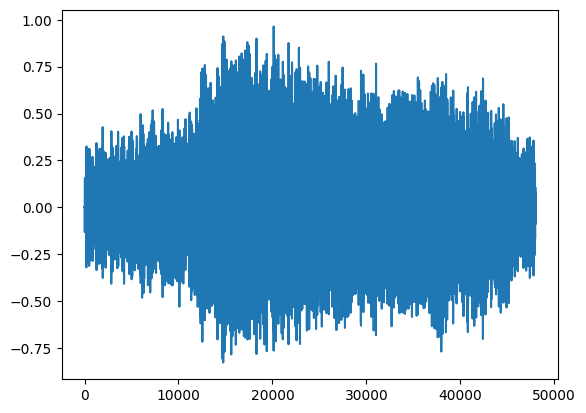

In [11]:

plt.plot(wave)


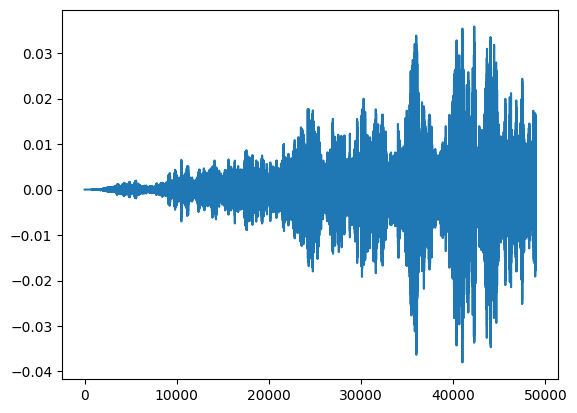

In [12]:
plt.plot(nwave)

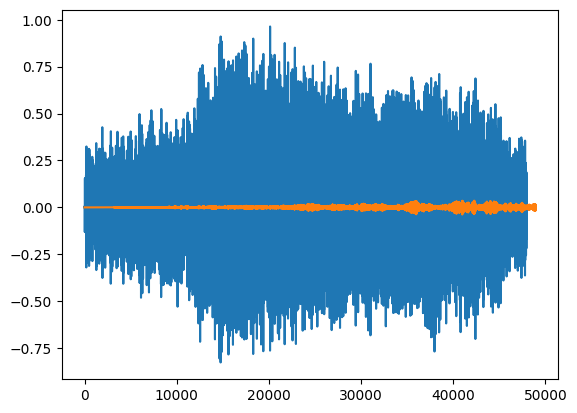

In [13]:
plt.plot(wave)
plt.plot(nwave)
plt.show()


---

<br>
<br>

# `3. Create tensorflow dataset: `


In step two, We convert the raw audio into waveforms by  using the tensorflow decode wave method into a spectrogram using the short time fourier transform. Here, we don't implement stft . From chatgpt i get the information . About that.

<br>
<br>

---


<br>
<br>

# `# 3.1 create path :`

<br>
<br>

In [14]:
# Positve for Capuchinabird:
# Negative for: Not Capuchinbird

POS = os.path.join("dataset","Parsed_Capuchinbird_Clips")
NEG = os.path.join("dataset","Parsed_Not_Capuchinbird_Clips")

NEG


'dataset/Parsed_Not_Capuchinbird_Clips'

<br>
<br>

# `# 3.2 Create tensorflow dataset:`

<br>
<br>

In [15]:


pos = tf.data.Dataset.list_files(POS + r'/*.wav')
neg = tf.data.Dataset.list_files(NEG+ r'/*.wav')

# we know we get a genetor function if we use this
pos.as_numpy_iterator().next() 


b'dataset/Parsed_Capuchinbird_Clips/XC227468-3.wav'

In [16]:

# we learn this in tensorflow pipeline:

for i in pos.take(3):
    print(i.numpy())
    
print()
print()

for i in pos.take(3).as_numpy_iterator():
    print(i)
    

b'dataset/Parsed_Capuchinbird_Clips/XC526106-3.wav'
b'dataset/Parsed_Capuchinbird_Clips/XC227471-2.wav'
b'dataset/Parsed_Capuchinbird_Clips/XC79965-4.wav'


b'dataset/Parsed_Capuchinbird_Clips/XC16804-1.wav'
b'dataset/Parsed_Capuchinbird_Clips/XC600460-1.wav'
b'dataset/Parsed_Capuchinbird_Clips/XC65196-4.wav'


2024-11-13 21:09:24.436853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-11-13 21:09:24.455527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
"""
we load 3 but when number 3 is done then: we try to fetch the no. 4 
but we get noting what's why we are getting error:
To solve this i use try and except:
"""

for _ in range(3):
    try:
        sample = pos.as_numpy_iterator().next()
        print(sample)
    except StopIteration:
        print("End of dataset reached.")
        break


b'dataset/Parsed_Capuchinbird_Clips/XC307385-0.wav'
b'dataset/Parsed_Capuchinbird_Clips/XC114132-6.wav'
b'dataset/Parsed_Capuchinbird_Clips/XC600460-0.wav'


<br>
<br>

# `# 3.3 Adding Level And Combine Positive and Negative. `


- `We will add 1 for positive and add 0 for negative.`

<br>
<br>



### `zip function: `

**Output:** Will be like this:  [(1, 'a'), (2, 'b'), (3, 'c')]

But tensorflow work with binary string that's why we get the output like this.

- (1, 'a') (regular Python string)
- (1, b'a') (Python bytes string)


In [18]:


# Create two datasets
dataset1 = tf.data.Dataset.from_tensor_slices([1, 2, 3])
dataset2 = tf.data.Dataset.from_tensor_slices(['a', 'b', 'c'])

# Zip the datasets
zipped_dataset = tf.data.Dataset.zip((dataset1, dataset2))

# Iterate through the zipped dataset using an iterator
for _ in range(3):  
    element = zipped_dataset.as_numpy_iterator().next()
    print(element)



(1, b'a')
(1, b'a')
(1, b'a')


In [19]:
for element in zipped_dataset.as_numpy_iterator():
    num, byte_str = element
    char = byte_str.decode('utf-8')  
    print((num, char))


(1, 'a')
(2, 'b')
(3, 'c')


2024-11-13 21:09:24.568412: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [20]:

# tf.ones() same as np.ones()
# tf.data.Dataset.from_tensor_slices(), we convert the tensor in tensor object
# tf.data.Dataset.zip() -> need tensor object

tf.data.Dataset.from_tensor_slices(tf.ones(len(pos))) 


<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>

In [21]:
type(pos) # is also tensor:

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

<br>

`We are passing 1 for capuchinbird and o for Non_capuchinbird means: at the end it's a binary classification problem. `

<br>

In [22]:

# main code: 
positives =  tf.data.Dataset.zip(pos,tf.data.Dataset.from_tensor_slices(tf.ones(len(pos))))
negatives = tf.data.Dataset.zip(neg,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg))))

data = positives.concatenate(negatives)
data


<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [23]:

# re-run and we will get both positive and negative:
data.shuffle(1000).as_numpy_iterator().next()


(b'dataset/Parsed_Not_Capuchinbird_Clips/crow-cawing-sound-effect-10.wav', 0.0)


---

<br>
<br>

# `#4. Determine Average Length of a Capuchin : `

`আমদের recoarding গুলো হলো 3 second আসলেই কি 3 second?আমরা তো কয়েকটা randomly recoarding check করে বলতেছি । এখন, এমন কিছু recoarding থাকতে পারে যেখানে হয়তো 3 second এর নিচে আছে । আর আমাদের capuchinbird এর আওয়াজ নেই এতে । ফলে আমাদের মডেল ভালো performance করতে পারবে না । আমরা ধরে নিতেছি 3 second এর মধ্যে কোন কিল্প থাকলে তার মধ্যে capuchinbird এর আওয়াজ আছে । `

audio যত বেশি long হবে সেইটা process করতে তত বেশি সময় লাগবে । শুধু শুধু unnecessary আওয়াজ তো recording করে লাভ নেই ।  

Here, we mainly calculate after reshapling we get the the sound, where capuchinbird sound are present .

<br>
<br>

---

<br>

## `4.1 calculate wave cycle length: `

<br>

In [24]:
os.listdir(os.path.join("dataset","Parsed_Capuchinbird_Clips"))

['XC114131-0.wav',
 'XC114131-1.wav',
 'XC114131-2.wav',
 'XC114131-3.wav',
 'XC114131-4.wav',
 'XC114132-0.wav',
 'XC114132-1.wav',
 'XC114132-2.wav',
 'XC114132-3.wav',
 'XC114132-4.wav',
 'XC114132-5.wav',
 'XC114132-6.wav',
 'XC119294-0.wav',
 'XC16803-0.wav',
 'XC16803-1.wav',
 'XC16803-2.wav',
 'XC16804-0.wav',
 'XC16804-1.wav',
 'XC168899-0.wav',
 'XC178167-0.wav',
 'XC178167-1.wav',
 'XC178167-2.wav',
 'XC178167-3.wav',
 'XC178168-0.wav',
 'XC178168-1.wav',
 'XC178168-2.wav',
 'XC178168-3.wav',
 'XC178168-4.wav',
 'XC178168-5.wav',
 'XC178168-6.wav',
 'XC178168-7.wav',
 'XC201990-0.wav',
 'XC201990-1.wav',
 'XC201990-2.wav',
 'XC201990-3.wav',
 'XC201990-4.wav',
 'XC201990-5.wav',
 'XC216010-0.wav',
 'XC216010-1.wav',
 'XC216010-2.wav',
 'XC216010-3.wav',
 'XC216010-4.wav',
 'XC216010-5.wav',
 'XC216010-6.wav',
 'XC216010-7.wav',
 'XC216012-0.wav',
 'XC216012-1.wav',
 'XC216012-10.wav',
 'XC216012-11.wav',
 'XC216012-12.wav',
 'XC216012-13.wav',
 'XC216012-14.wav',
 'XC216012-1

In [25]:

length = []

for file in os.listdir(os.path.join("dataset","Parsed_Capuchinbird_Clips")):
    tensor_wave = load_wav_16k_mono(os.path.join('dataset','Parsed_Capuchinbird_Clips',file))
    length.append(len(tensor_wave))

In [26]:
print(tf.math.reduce_mean(length))
print("second: ",(tf.math.reduce_mean(length)/16000)) # we resample it to 16k

tf.Tensor(54156, shape=(), dtype=int32)
second:  tf.Tensor(3.38475, shape=(), dtype=float64)


In [27]:
print(tf.math.reduce_max(length))
print("second: ",(80000/16000)) # we resample it to 16k

tf.Tensor(80000, shape=(), dtype=int32)
second:  5.0


In [28]:

print(tf.math.reduce_min(length))
print("second: ",(tf.math.reduce_min(length)/16000)) # we resample it to 16k


"""
In conclusion, we have audio length between: 2s to 5s.
"""


tf.Tensor(32000, shape=(), dtype=int32)
second:  tf.Tensor(2.0, shape=(), dtype=float64)


'\nIn conclusion, we have audio length between: 2s to 5s.\n'

---

<br>
<br>

# `#5. Build Processing Function to Convert to Spectrogram: `

<br>
<br>

---


In [29]:

data.shuffle(1000).as_numpy_iterator().next()

# here we are getting, file_path + level(1.0)

"""
`আমরা দেখলাম যে, reshampling করার পর আমাদের max audio length: 5s min audio length: 2s `
`এতে করে আমাদের model stable হবে না । তাই আমরা একটা length ধরে নিব । যদি audio length এর  
কম হয় তাহলে padding করবো, আর যদি কম না হয় তাহলে short করবো । `
"""

# এর পর আমরা, step: 3 তে short time fourier analysis দেখেছিলাম সেইটা apply করবো । 

# why abs?। 

# as cnn work with image, it need to sure to give an channel. That's why we reshape it.
# with out channel (134*123) for gray scale image (134*123*1) 1 is for channel.

print()


In [30]:
wav = load_wav_16k_mono(CAPUCHIN_FILE)
wav = wav[:48000]
zero_padding = tf.zeros([48000] - tf.shape(wav),dtype=tf.float32)
wav = tf.concat([zero_padding,wav],0)
spectrogram  = tf.signal.stft(wav,frame_length=320,frame_step=32)
spectrogram = tf.abs(spectrogram)
spectrogram = tf.expand_dims(spectrogram,axis=2)
spectrogram


<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[1.9284576e-02],
        [2.5178017e-02],
        [2.9214393e-02],
        ...,
        [3.1447731e-04],
        [2.5479635e-04],
        [4.2855740e-05]],

       [[9.8426342e-03],
        [6.1191241e-03],
        [8.5134320e-03],
        ...,
        [4.6089364e-04],
        [2.3450179e-04],
        [2.1843612e-04]],

       [[1.1091478e-02],
        [6.1596134e-03],
        [8.8295303e-03],
        ...,
        [5.1374751e-04],
        [3.0357897e-04],
        [2.1337718e-04]],

       ...,

       [[6.3687041e-03],
        [7.4076606e-03],
        [1.7366964e-02],
        ...,
        [5.8603467e-04],
        [2.5829941e-04],
        [1.5325844e-05]],

       [[5.7284534e-03],
        [1.0320787e-02],
        [9.9356910e-03],
        ...,
        [6.0418347e-04],
        [2.4157179e-04],
        [8.3535910e-05]],

       [[4.4908077e-03],
        [4.3125013e-03],
        [1.3786664e-02],
        ...,
        [5.7166541

In [31]:

def processing(file_path,label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav),dtype=tf.float32)
    wav = tf.concat([zero_padding,wav],0)
    spectrogram  = tf.signal.stft(wav,frame_length=320,frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram,axis=2)
    label = tf.expand_dims(label,-1)
    return spectrogram,label


shape spectrogram (1491, 257, 1)
label shape :  (1,)


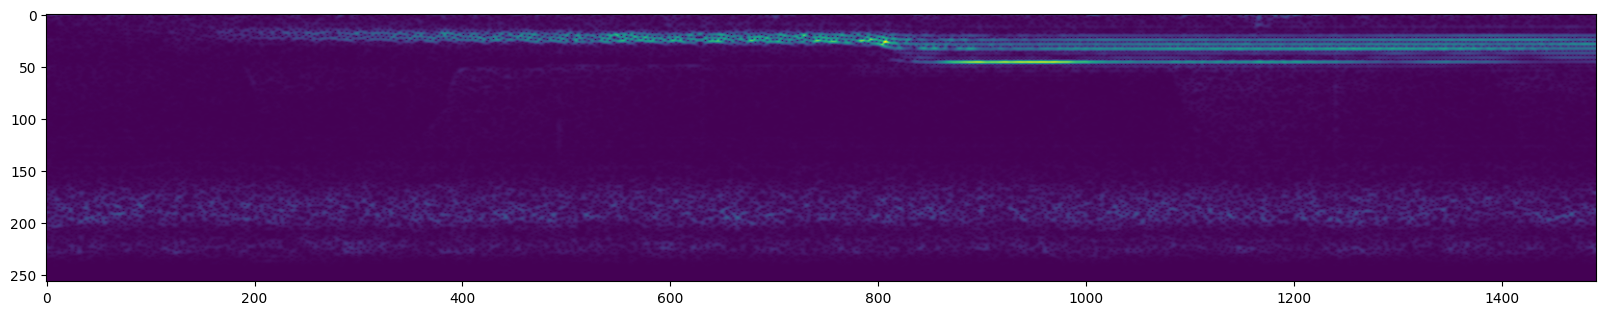

In [32]:

# test and vislize the spectrogram :
file_path, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram,label = processing(file_path,label)
print("shape spectrogram",spectrogram.shape)
print("label shape : ",label.shape)
plt.figure(figsize=(20,10))
# for a cnn channel we need to give: tf.transpose(spectrogram)[0]
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()


---

<br>
<br>

# `#6. Creating and testing partitions: `

<br>
<br>

---


#### `# 6.1: Create tensorflow data pipeline: `


In [33]:
data = data.map(processing)
#data = data.cache()
data = data.shuffle(buffer_size=100)
data = data.batch(8)
#data = data.prefetch(4)


#### `# 6.2: Split into Traning and Testing Partitions:  `


In [34]:
len(data)*.7 # take 70% for traning than we got almost 36

71.39999999999999

In [35]:


train = data.cache().take(72).repeat()
test = data.cache().skip(72).take(15).repeat()



In [36]:

sample ,label = train.as_numpy_iterator().next()


# 8,1491,257,1
# total histrogram of voice, is 8
# histrogram image (1491,257,1)

print("sample: ",sample.shape)
print("label: ",label.shape)

2024-11-13 21:09:57.109147: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


sample:  (8, 1491, 257, 1)
label:  (8, 1)


---
---

<br>

# `#7. Build the deep learning model: `

<br>

---
---


<br>

#### `#7.1 Build sequential model: `
<br>

In [37]:

relu = tf.keras.activations.relu
sigmoid = tf.keras.activations.sigmoid

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation=relu,input_shape=(1491,257,1)))
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation=relu))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128,activation=relu))
model.add(tf.keras.layers.Dense(units=1,activation=sigmoid))



/home/yasin/allProgram/100DaysDL/code/venvML/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-13 21:09:58.843683: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3081920512 exceeds 10% of free system memory.


2024-11-13 21:10:02.958007: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3081920512 exceeds 10% of free system memory.


In [ ]:


model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 1489, 255, 8)   │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 1487, 253, 8)   │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3009688)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │   385,240,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385,240,985 (1.44 GB)

 Trainable params: 385,240,985 (1.44 GB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

adam = tf.keras.optimizers.Adam()
loss = tf.keras.losses.BinaryCrossentropy()

recall = tf.keras.metrics.Recall()

model.compile(optimizer=adam,loss=loss,metrics=[recall])



In [ ]:

# verify the shape of data: 

for data, label in train.take(1):
    print("Train data shape:", data.shape)
    print("Train label shape:", label.shape)

for data, label in test.take(1):
    print("Test data shape:", data.shape)
    print("Test label shape:", label.shape)
    


Train data shape: (8, 1491, 257, 1)
Train label shape: (8, 1)


2024-11-13 20:22:15.238899: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-11-13 20:22:15.517417: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-11-13 20:22:15.553453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence

Test data shape: (8, 1491, 257, 1)
Test label shape: (8, 1)


2024-11-13 20:22:41.826861: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-11-13 20:22:42.131204: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-11-13 20:22:42.247611: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence

In [ ]:

hist = model.fit(train,epochs=4,validation_data=test)

Epoch 1/4


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=True
  • mask=None

In [ ]:

# save the model: 
model.save("Capuchinbird_clips_model.h5")



---
---

<br>
<br>

# `#8. make a prediction: `

<br>
<br>

---
---
